# Information Visualization
## Coursework 2

In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from countries import countries
from time import sleep, time

%matplotlib inline

In [2]:
country_names = [c['name'] for c in countries]
pollution = pd.DataFrame(np.random.uniform(0, 100, (20, len(country_names))),
                         columns=country_names,
                         index=reversed(pd.date_range(start='2000', end='2020', freq='Y')))
pollution.head()

,Andorra,Afghanistan,Antigua and Barbuda,Albania,Armenia,Angola,Argentina,Austria,Australia,Azerbaijan,...,Saint Vincent and the Grenadines,Samoa,Serbia,South Africa,Spain,Sri Lanka,Swaziland,Switzerland,United Arab Emirates,United Kingdom
2019-12-31,42.421409,0.318933,89.637458,21.669607,75.010524,29.579375,78.758228,95.120222,60.251322,81.814796,...,35.490114,83.327230,67.089007,58.370492,93.556517,48.939034,20.413804,96.923141,93.668156,80.405298
2018-12-31,20.164964,4.493527,91.543578,59.981221,19.490821,93.099137,8.556930,22.110254,86.100817,25.040437,...,85.428884,90.758225,97.183173,70.594348,56.224212,6.321395,87.404995,62.653293,80.934206,81.123447
2017-12-31,87.439534,50.704483,45.919456,61.016962,78.634687,29.293265,8.477409,12.454968,36.245510,16.131886,...,0.233378,79.197274,81.837173,25.838784,91.225659,14.492367,50.498752,96.019208,3.062885,50.532783
2016-12-31,12.796640,85.807510,52.916200,96.468301,47.027191,48.127955,88.784540,13.317431,0.738673,32.467145,...,23.086492,85.075198,44.253659,77.237321,70.666185,94.666543,13.663380,24.045600,93.559000,6.575931
2015-12-31,12.215776,25.662844,99.763254,90.788795,40.794007,84.746310,79.199078,88.684661,68.154772,11.557112,...,46.373749,56.157910,60.535715,15.559809,63.891343,51.506327,13.816295,32.060859,20.968938,25.313262


In [3]:
pollution = pollution.sum().sort_values(ascending=False).iloc[:20]

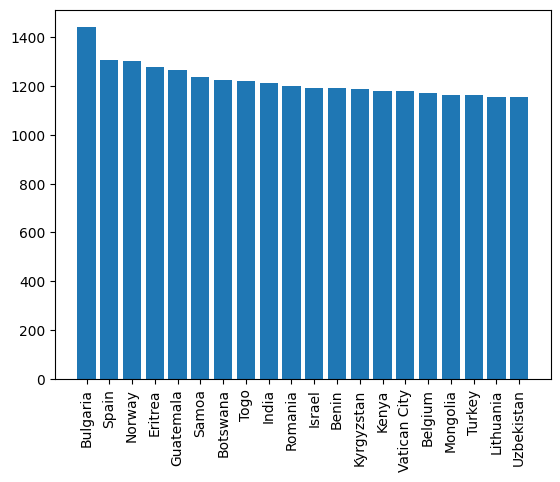

In [4]:
plt.bar(pollution.index, pollution)
plt.xticks(rotation=90)
plt.show()

In [5]:
def get_name():
    data = os.listdir('results')
    start = 1 if len(data) > 0 and data[0] == '.ipynb_checkpoints' else 0
    for i, d in enumerate(data[start:]):
        if f"{i}.json" != d:
            return str(i) + '.json'
    return str(len(data[start:])) + '.json'

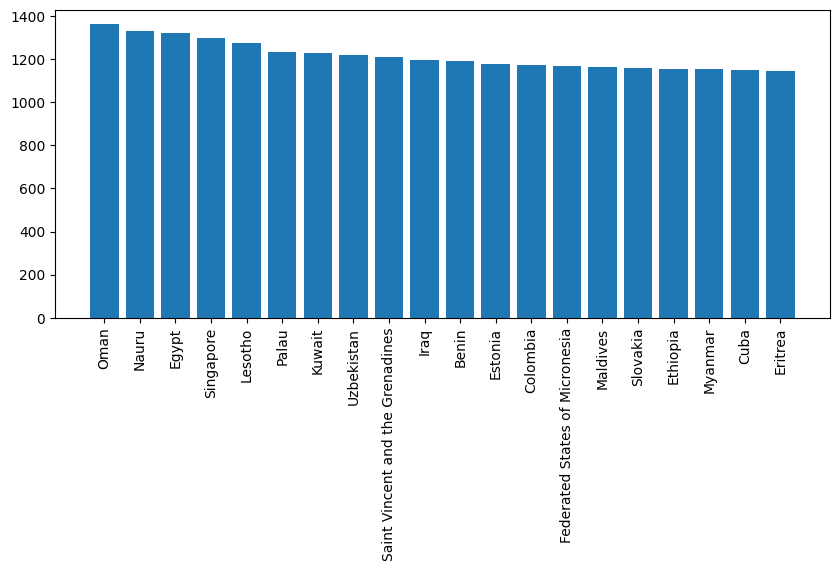

Which country pollutes the most?
Oman:                                   1
Benin:                                  2
Slovakia:                               3
Colombia:                               4
Cuba:                                   5


 1


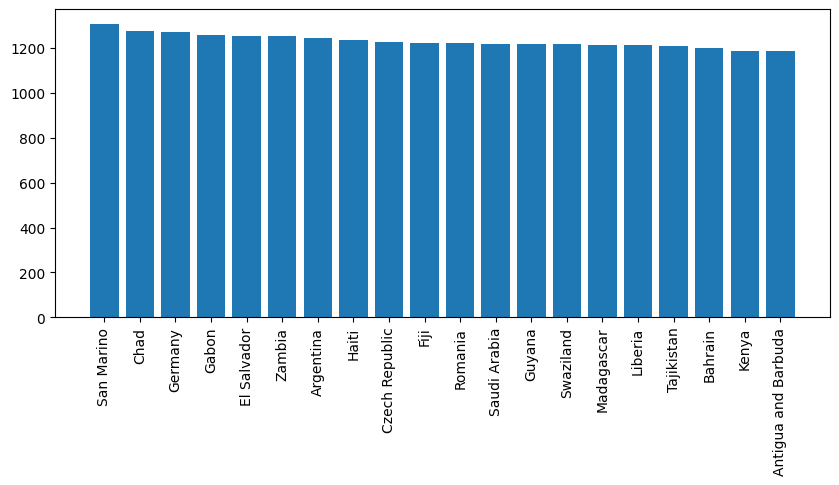

Which country pollutes the most?
Haiti:                                  1
Bahrain:                                2
San Marino:                             3
Antigua and Barbuda:                    4
Tajikistan:                             5


 3


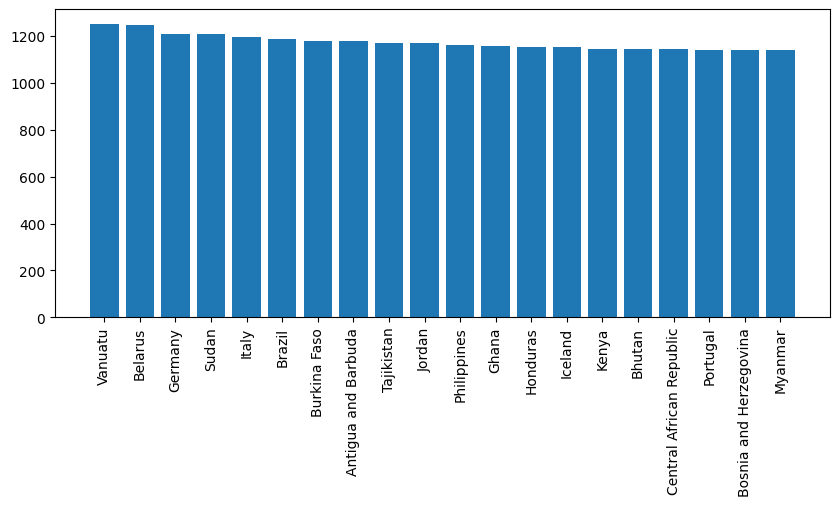

Which country pollutes the most?
Iceland:                                1
Vanuatu:                                2
Belarus:                                3
Brazil:                                 4
Jordan:                                 5


 2


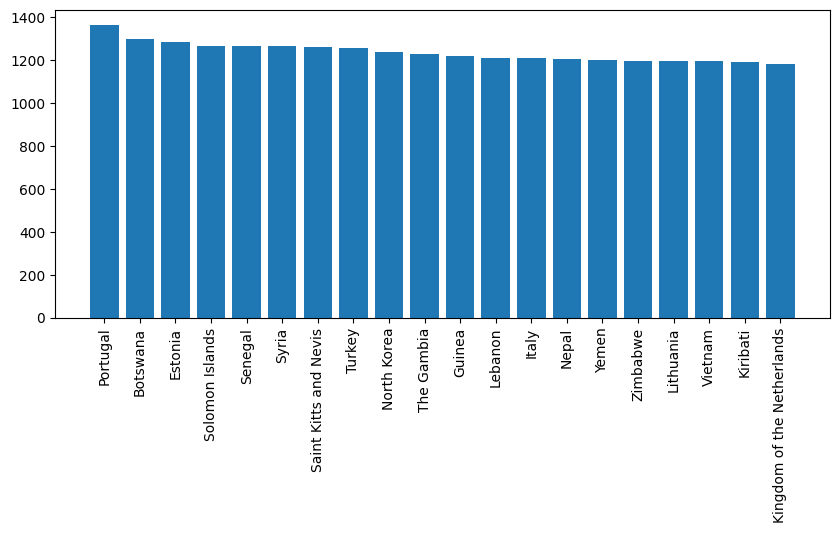

Which country pollutes the most?
Portugal:                               1
Vietnam:                                2
Saint Kitts and Nevis:                  3
Turkey:                                 4
Kingdom of the Netherlands:             5


 1


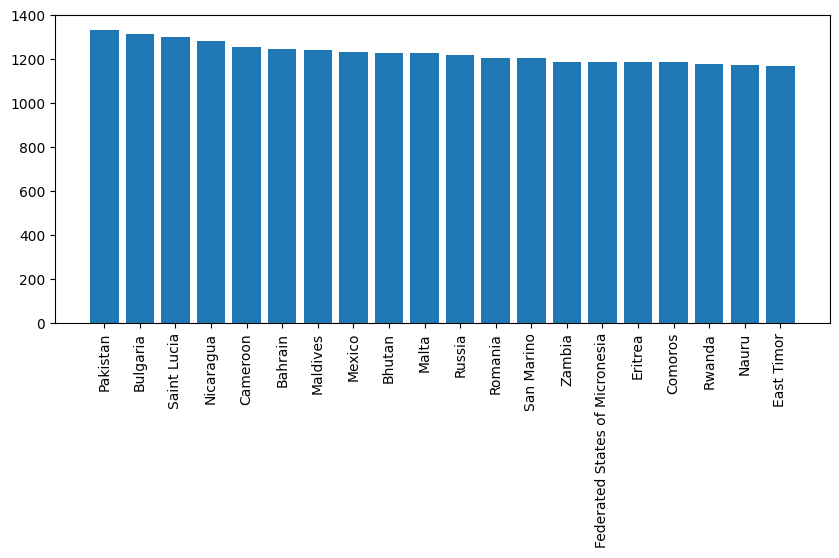

Which country pollutes the most?
Bhutan:                                 1
Pakistan:                               2
Cameroon:                               3
Malta:                                  4
Mexico:                                 5


 2


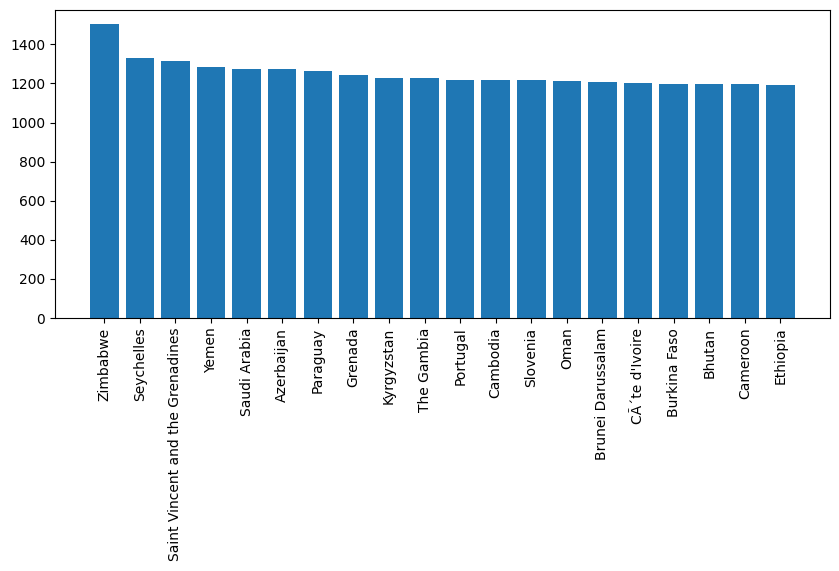

Which country pollutes the most?
CÃ´te d'Ivoire:                         1
Zimbabwe:                               2
Seychelles:                             3
Cambodia:                               4
Brunei Darussalam:                      5


 2


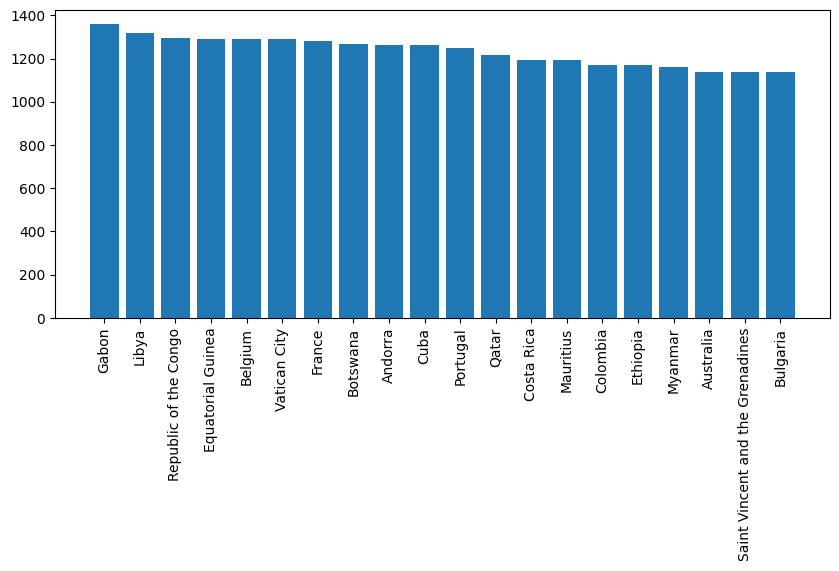

Which country pollutes the most?
Libya:                                  1
Gabon:                                  2
Botswana:                               3
Costa Rica:                             4
Portugal:                               5


 2


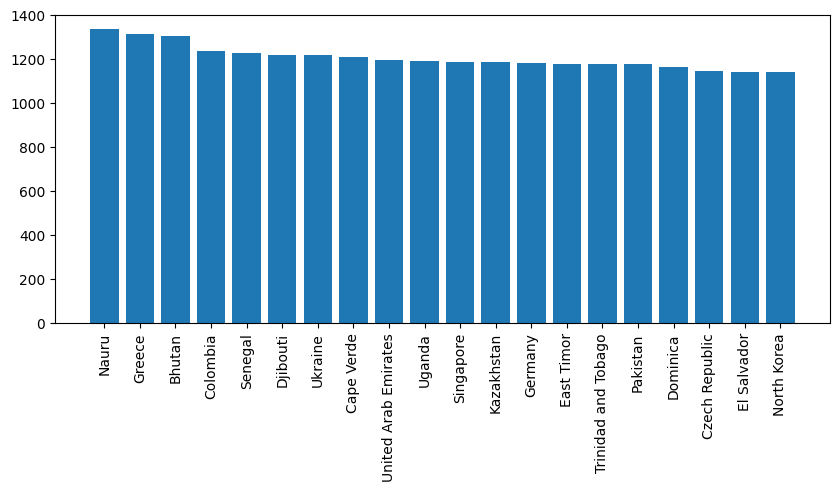

Which country pollutes the most?
United Arab Emirates:                   1
Bhutan:                                 2
Nauru:                                  3
East Timor:                             4
Singapore:                              5


 3


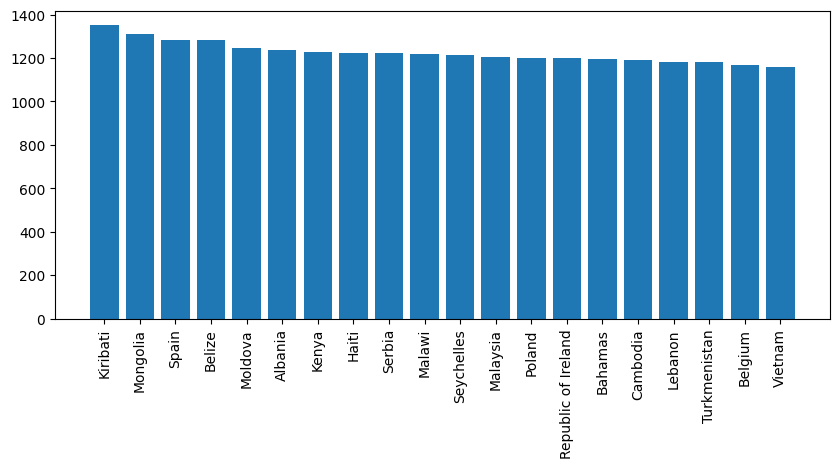

Which country pollutes the most?
Lebanon:                                1
Republic of Ireland:                    2
Kiribati:                               3
Poland:                                 4
Spain:                                  5


 3


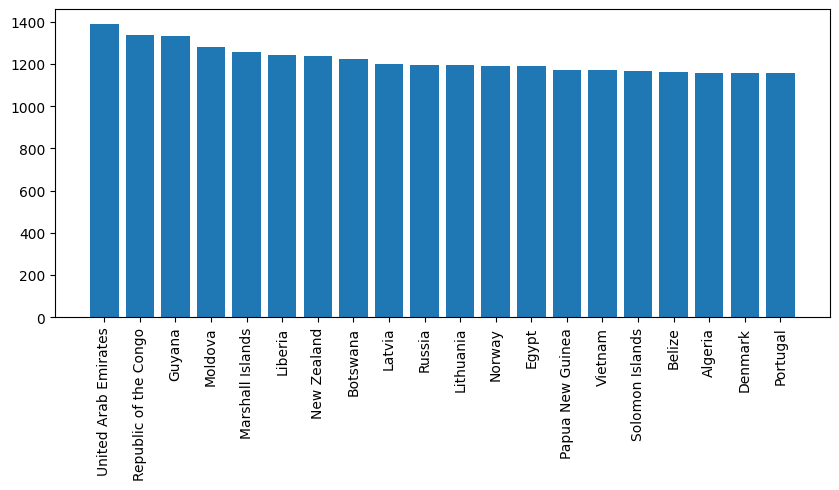

Which country pollutes the most?
Portugal:                               1
United Arab Emirates:                   2
Norway:                                 3
Marshall Islands:                       4
Botswana:                               5


 2


In [6]:
name = get_name()
n = 10
ans, correct, times = *np.empty((3, n)),

for e in range(n):
    pollution = pd.DataFrame(np.random.uniform(0, 100, (20, len(country_names))),
                             columns=country_names,
                             index=reversed(pd.date_range(start='2000', end='2020', freq='Y')))
    pollution = pollution.sum().sort_values(ascending=False).iloc[:20]
    
    plt.figure(figsize=(10, 4))
    plt.bar(pollution.index, pollution)
    plt.xticks(rotation=90)
    plt.show()
    
    sample = pd.concat([pollution.iloc[:1], pollution[1:].sample(4)]).sample(frac=1).index
    cor = sample.get_loc(pollution.iloc[:1].index[0]) + 1
    
    print("Which country pollutes the most?")
    for i, c in enumerate(sample):
        print("{0:40}{1}".format(c + ':', i+1))
    
    s = time()
    answer = int(input(""))
    
    ans[e] = answer
    correct[e] = cor
    times[e] = (time() - s)
    
    sleep(1)
with open(os.path.join('results', name), 'w') as f:
    json.dump({'correct': (correct == ans).sum()/n,
               'res_mean': times.mean(),
               'res_std': times.std()}, f)

In [7]:
print(f"Precentage of correct answers: {(correct == ans).sum()/n:.2}")
print(f"Mean respnse time: {times.mean():.2}\nResponse time standard deviation: {times.std():.2}")

Precentage of correct answers: 1.0
Mean respnse time: 3.5
Response time standard deviation: 1.1
